<a href="https://colab.research.google.com/github/pawank99235/Credit_Card_default_prediction/blob/main/Credit_Card_Default_Prediction_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name : Credit Card Default Prediction**

**Project Type : Classification**

Done by : **Pavankumar Kashyap**

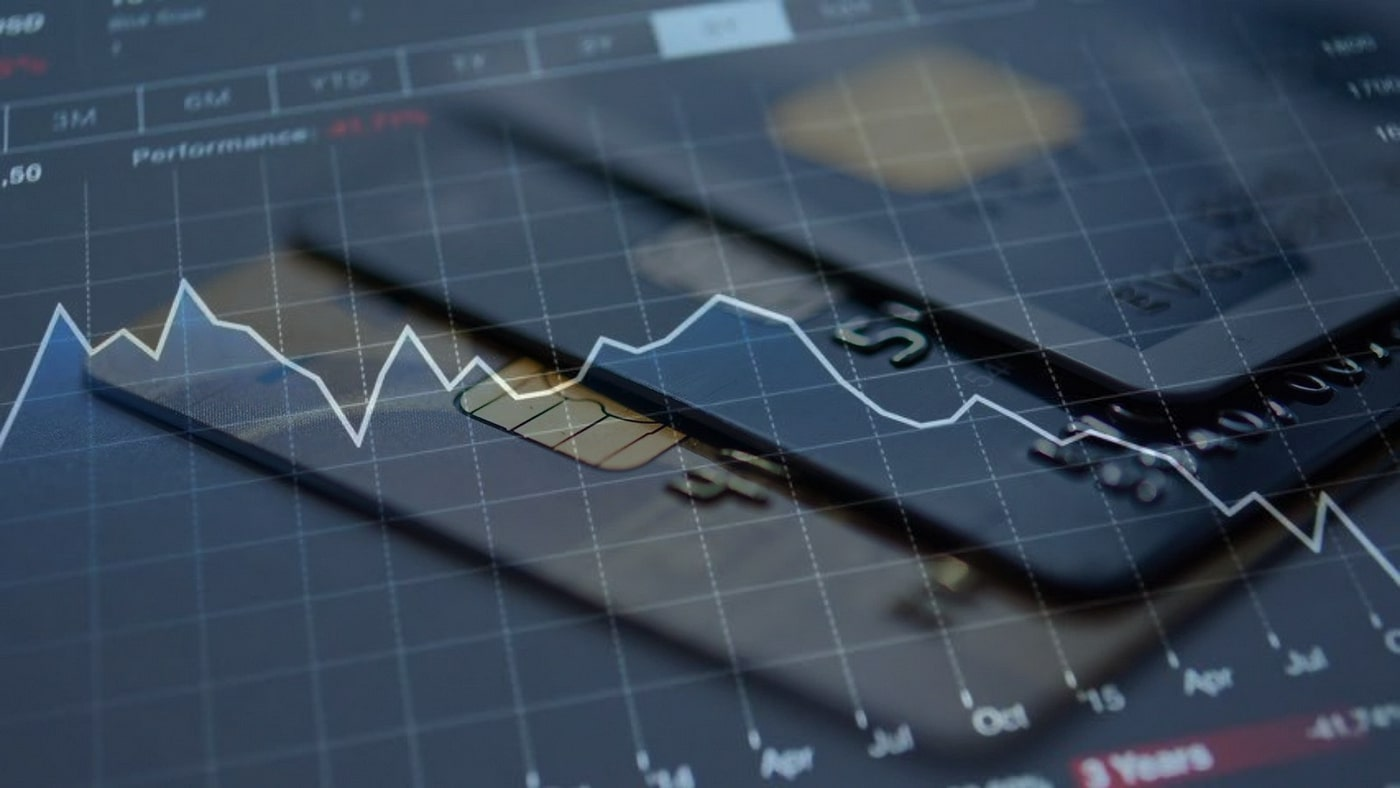

# **Project Summary**

The essence Credit Card Default prediction project is to study the data of numerous customers and build machine learning models to efficiently predict if a person is suseptible of default based on the data given. Initially, a basic understanding of the data is performed by using Exploratory Data Analysis with the help of certain visualization techniques and then any outliers or null values are handled to make the dataset well organized to perform predictions. Meanwhile VIF(Variance Inflation Factor) and a check for multicollinearity is also performed to eliminate any further dependancy of the independant variables present in the dataset. Finally, numerous machine learning models are implemented to predict the possibility of default. The main goal of this project is to study and apply classification models to better predict the outcome.

# **Problem Statement**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

# **Data Description**

Amount - Credit amount

Gender - Gender

Education - Educational qualification

Martial Status - Married or not

Age - Age

History of past payments - Payments made in past

Amount of bill statement - Bill amount

Amount of previous payment - Previous amount paid

# **Github Link**

# **Importing Libraries**

To explore and visualize our dataset,we are importing python libraries

In [ ]:
#Import Libraries
import numpy as np
import numpy as math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from pprint import pprint
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Mounting the data xls
from google.colab import drive
from google.colab import files
source_file = files.upload()

Saving default_of_credit_card_clients.xls to default_of_credit_card_clients.xls


In [ ]:
#Reading the dataset with the help of pandas
import pandas as pd
import io
dataset = pd.read_excel(io.BytesIO(source_file['default_of_credit_card_clients.xls']))

In [ ]:
#description of our data which contains all rows and columns
dataset.describe(include = 'all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In our dataset there are 8 rows and 25 columns

In [ ]:
#Changing the name of one column for better understanding
dataset.rename(columns = {'default payment next month':'default_payment_next_month'}, inplace = True)

In [ ]:
#After changing the column name let's print our dataset
print(dataset.head)

<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BI

In [ ]:
# Counting the null values
print(f'Total Number of Null Values: {dataset.isna().sum()}')

Total Number of Null Values: ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


In our data there are no null values present

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#Replacing the name from 0 to 1 in order to maintain the sequence
dataset.rename(columns={'PAY_0':'PAY_1'},inplace=True)

## **EDA (Explorating Data Analysis)**

In [ ]:
#Summary of our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#Counting the values of our y variable
dataset['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

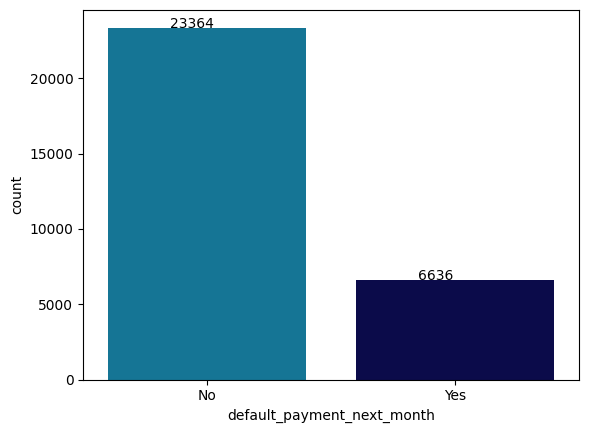

In [ ]:
#Plotting Graph of default payment next month
ax=sns.countplot(dataset,x=dataset['default_payment_next_month'],palette ='ocean_r')
plt.xticks(rotation=0,ticks=range(2),labels=['No','Yes'])
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


From the above graph we conclude that  number of Defaulter are less than Non- Defaulters

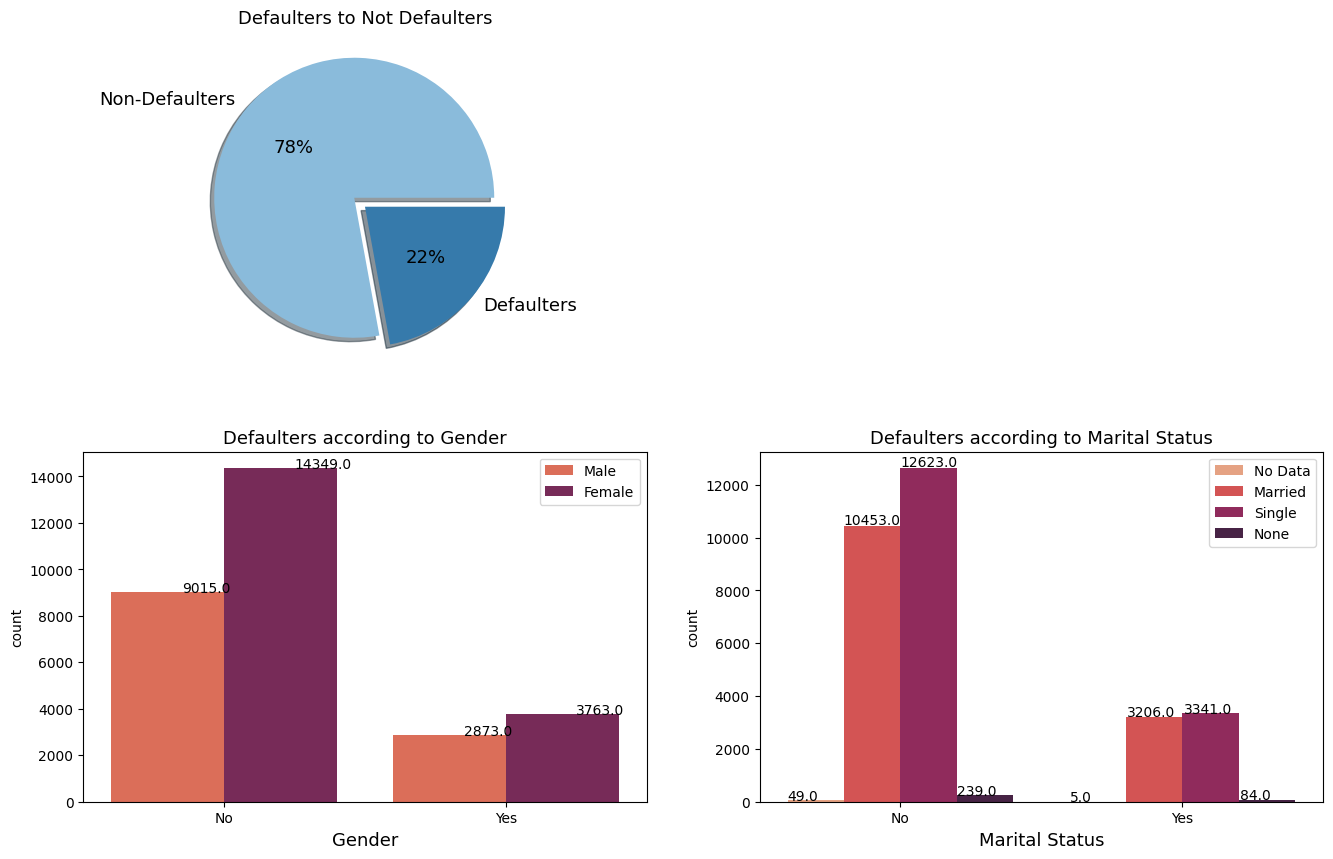

In [ ]:
# Creating a subplots to visualize the defaulters and non - defaulters
plt.figure(figsize = (16,10))

# Subplot 1
plt.subplot(221)
plt.pie(dataset['default_payment_next_month'].value_counts(),radius=1, autopct='%1.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['Non-Defaulters','Defaulters'],explode = [0.1, 0],
        shadow=True,colors=['#8ABBDB','#367AAB'])
plt.title('Defaulters to Not Defaulters',fontdict={'size':13})

# Subplot 2 to visualize the defaulters with respect to genders
plt.subplot(223)
ax=sns.countplot(dataset,x=dataset['default_payment_next_month'],hue=dataset['SEX'],palette ='rocket_r')
plt.xticks(rotation=0,ticks=range(2),labels=['No','Yes'])
plt.legend(['Male','Female'])
plt.xlabel('Gender',fontdict={'size':13})
plt.title('Defaulters according to Gender',fontdict={'size':13})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.25))

# Subplot 3 to visualize the defaulters with respect to Martial Status
plt.subplot(224)
ax=sns.countplot(dataset,x=dataset['default_payment_next_month'],hue=dataset['MARRIAGE'],palette ='rocket_r')
plt.xticks(rotation=0,ticks=range(2),labels=['No','Yes'])
plt.legend(['No Data','Married','Single','None'])
plt.xlabel('Marital Status',fontdict={'size':13})
plt.title('Defaulters according to Marital Status',fontdict={'size':13})
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [ ]:
# Changing the name for better understanding the data
dataset.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
dataset.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
dataset.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

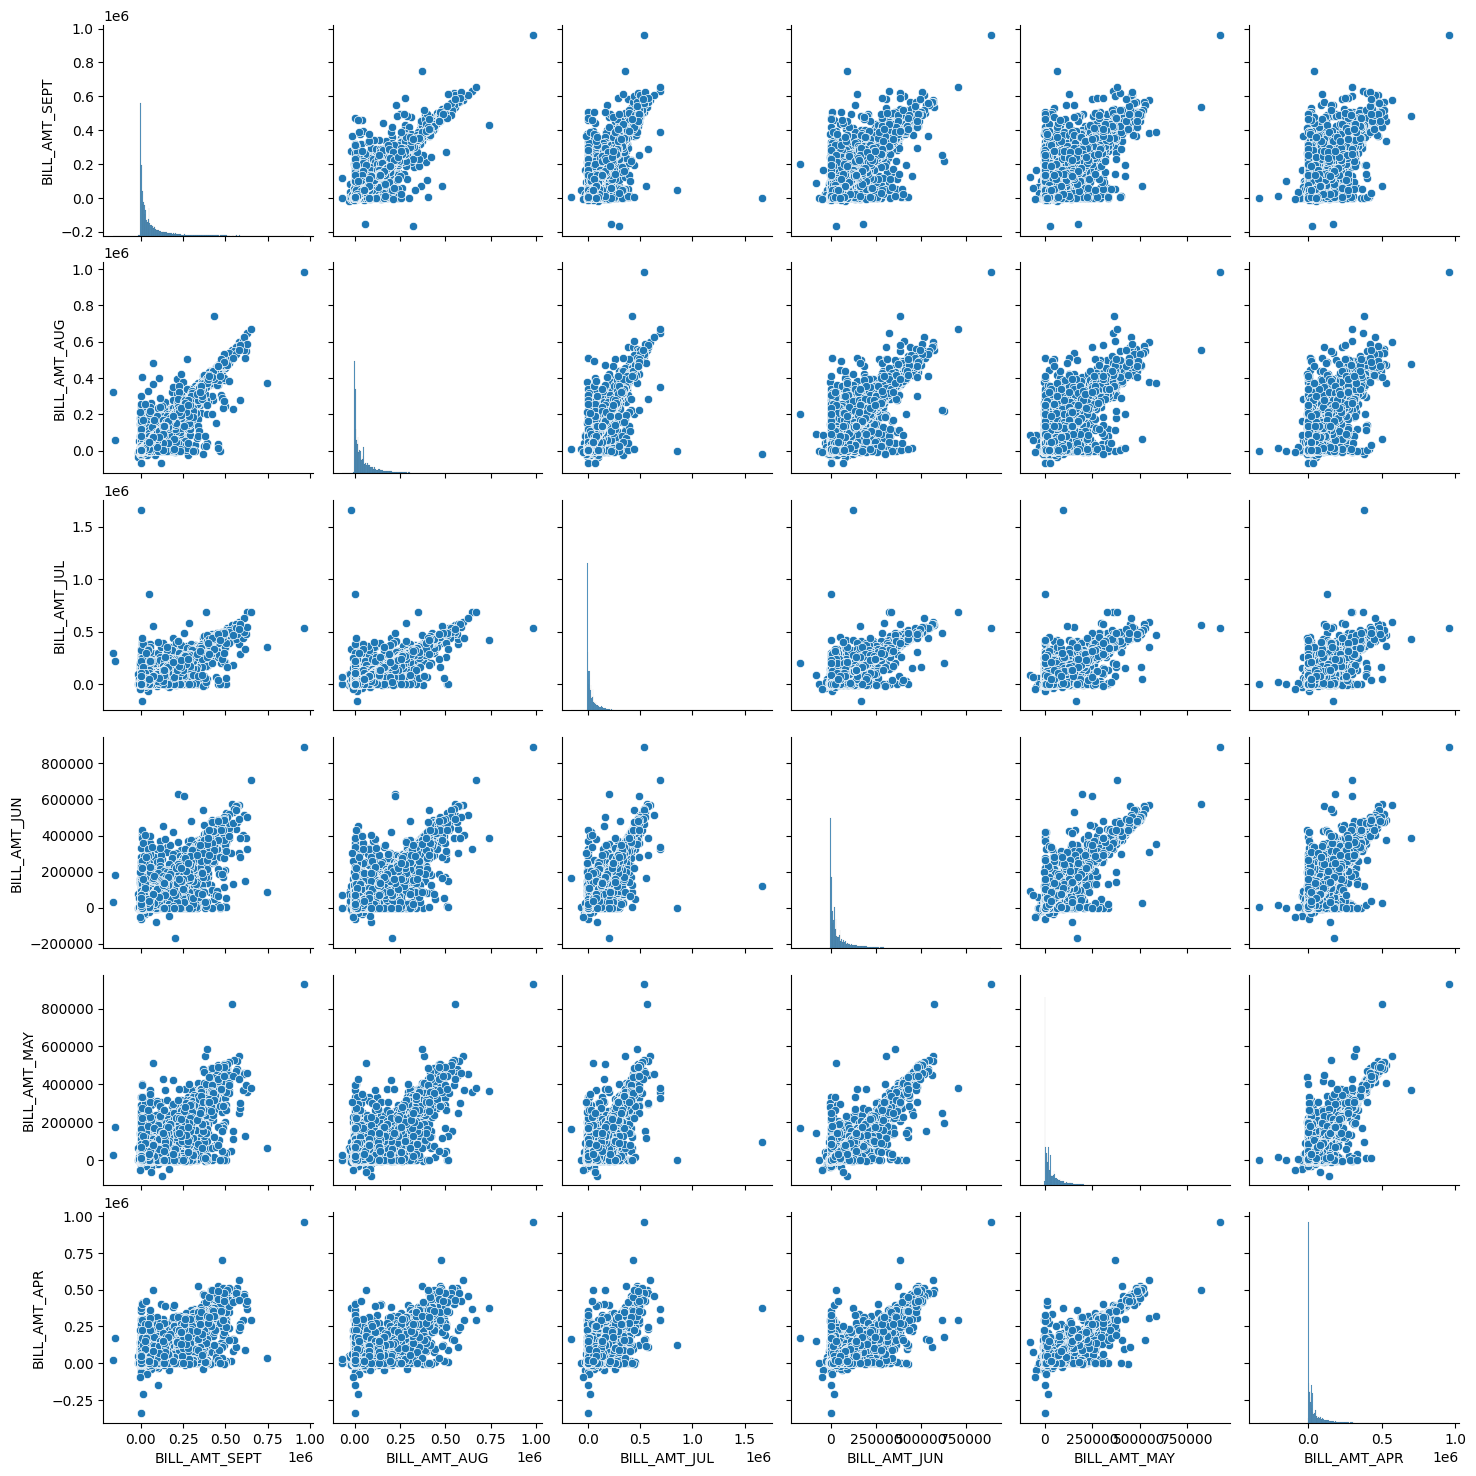

In [ ]:
#Plotting graph of dues according to their month
sns.pairplot(data = dataset[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']])

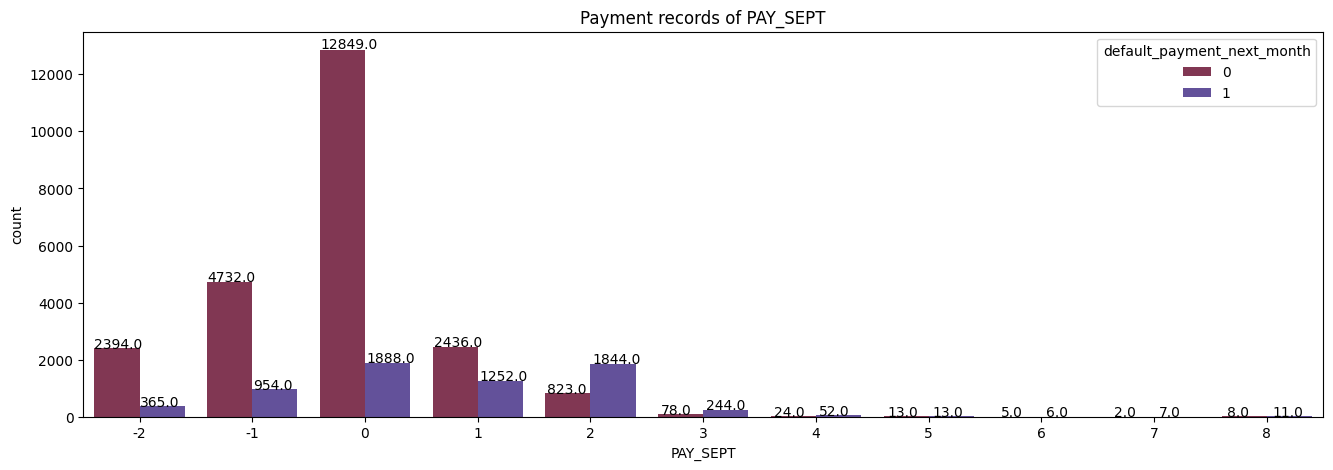

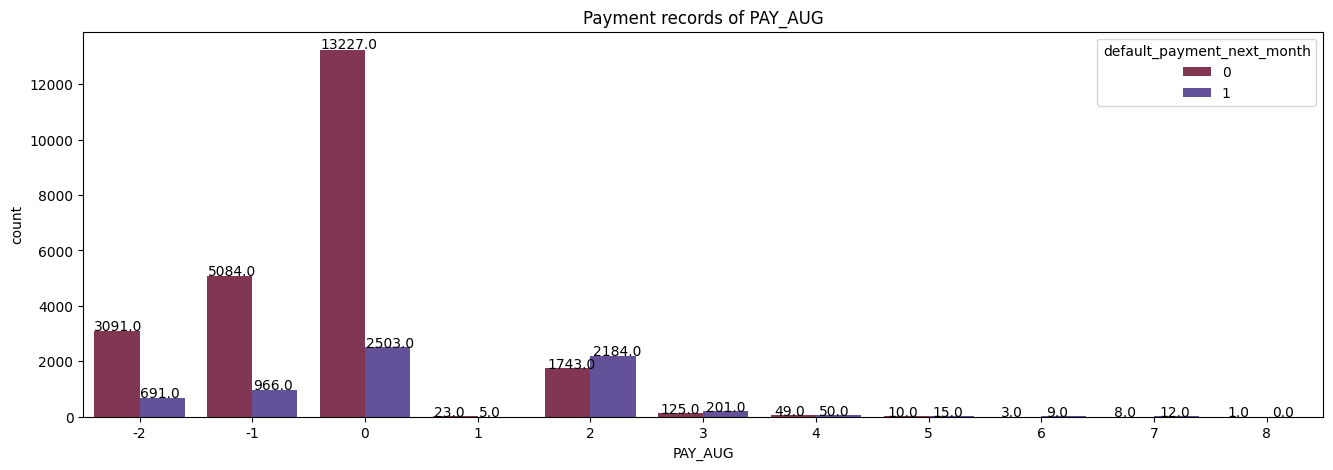

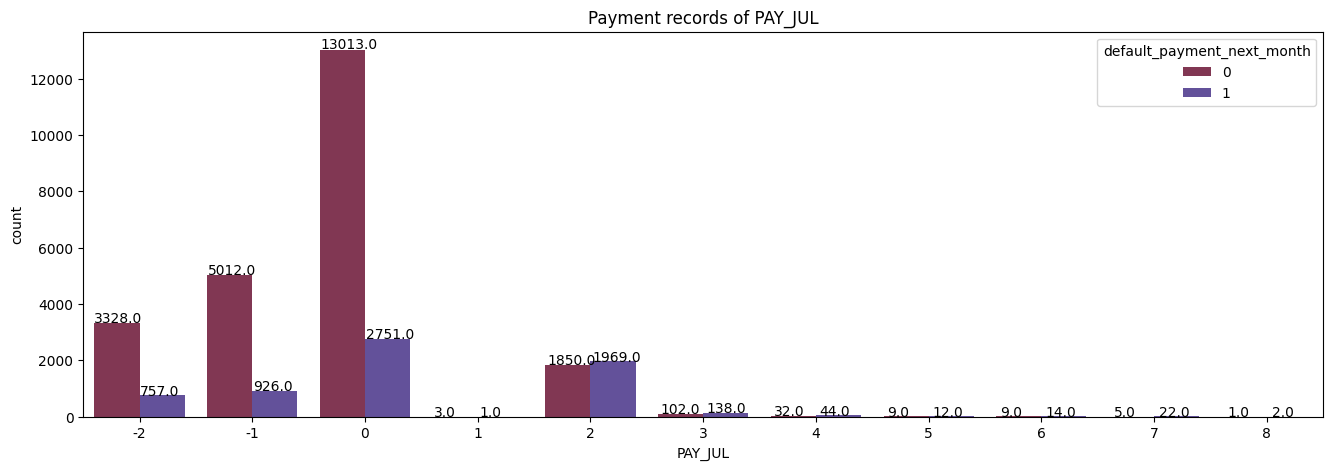

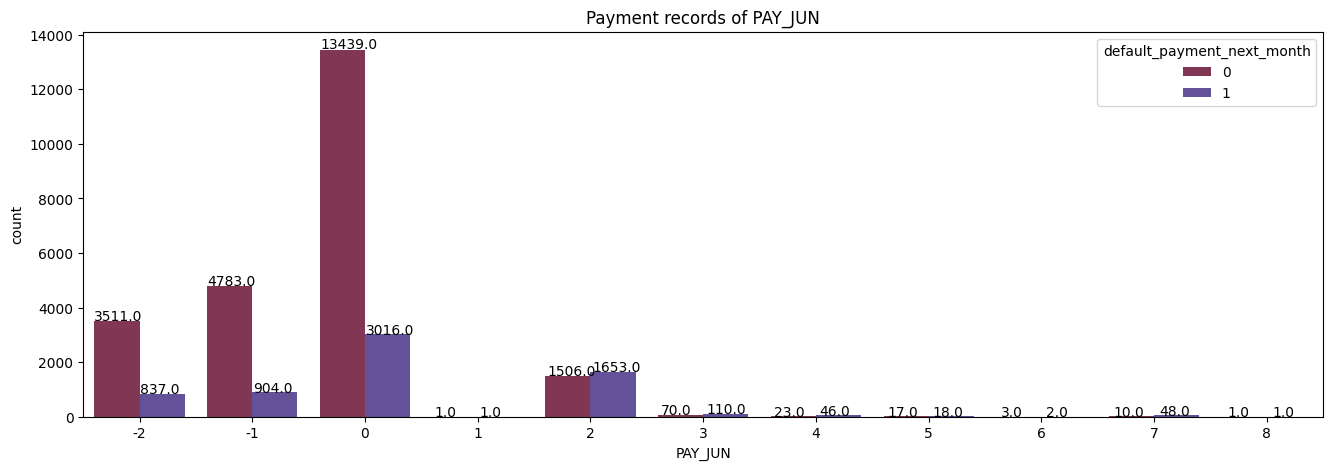

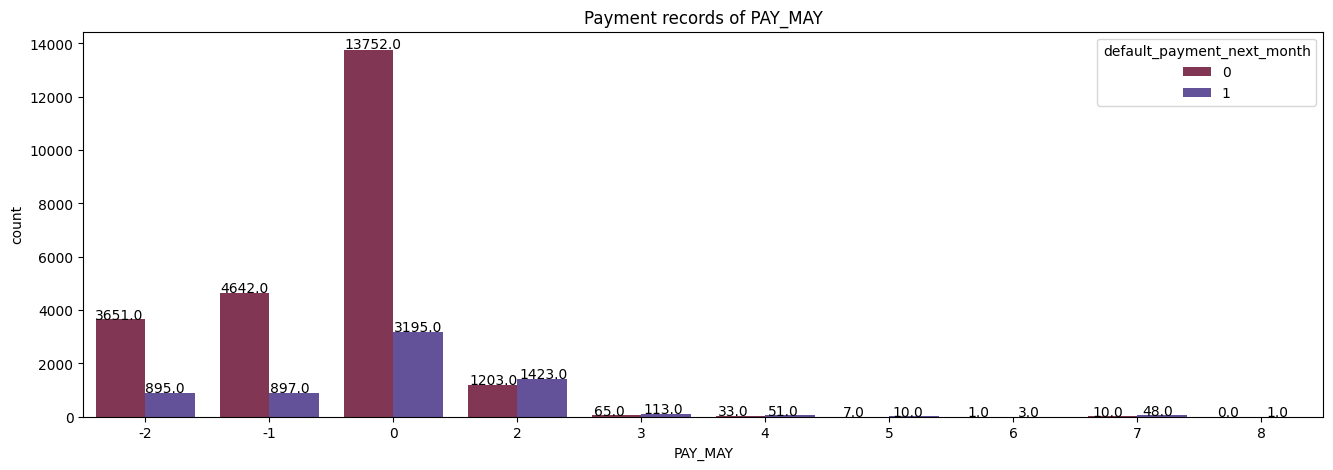

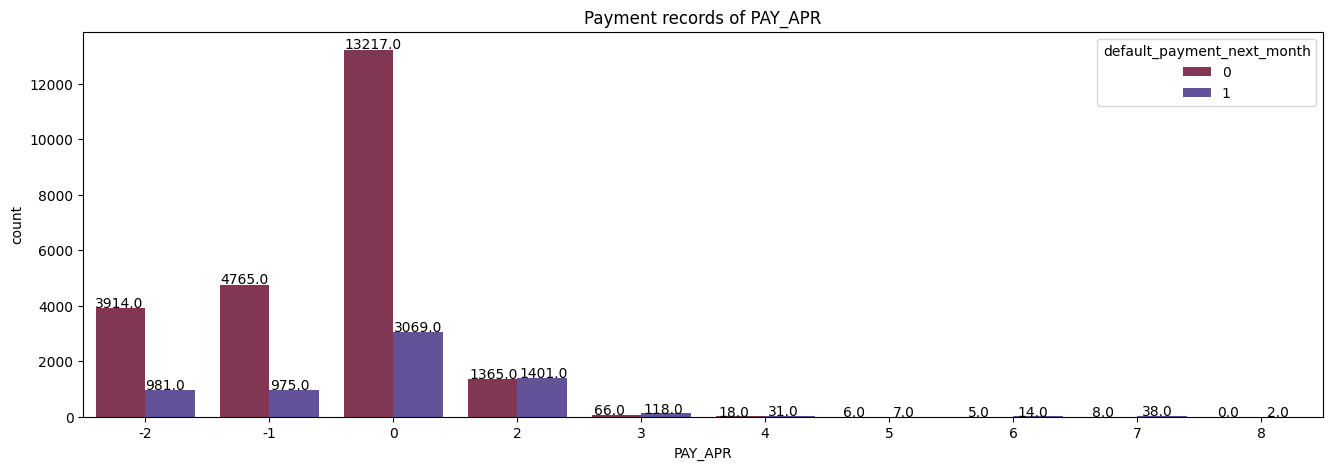

In [ ]:
#Plotting graph of payments records which are payable in respective months
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

for col in pay_col:
    plt.figure(figsize=(16,5))
    plt.title(f'Payment records of {col}')
    ax=sns.countplot(x = col, hue = 'default_payment_next_month', data = dataset,palette ='twilight_r')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Text(0.5, 0, 'Age in years')

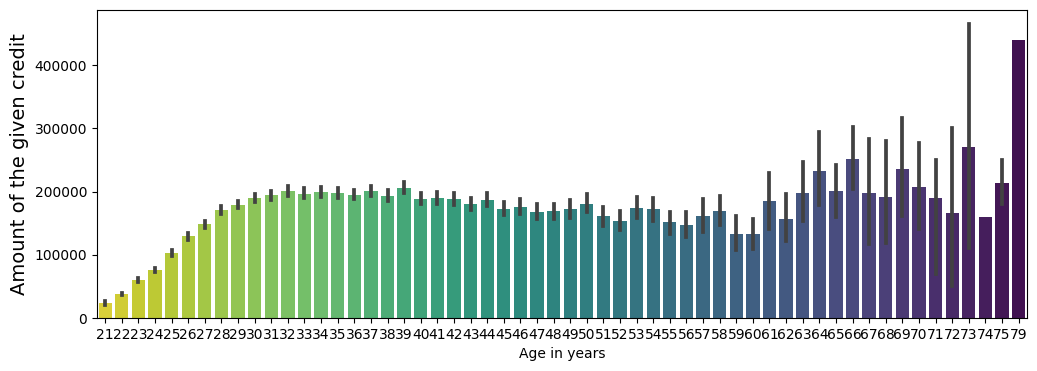

In [ ]:
#Creating graph of Amount given in credit with respect to customers age (years)
plt.figure(figsize=(12,4))
sns.barplot(x=dataset['AGE'],y=dataset['LIMIT_BAL'],palette ='viridis_r')
plt.ylabel('Amount of the given credit',fontdict={'fontsize':14})
plt.xlabel('Age in years')

In [ ]:
# Cleaning Education
fil = (dataset['EDUCATION'] == 0) | (dataset['EDUCATION'] == 5) | (dataset['EDUCATION'] == 6)
dataset.loc[fil, 'EDUCATION'] = 4

In [ ]:
# Cleaning Marriage
fil = dataset['MARRIAGE'] == 0
dataset.loc[fil, 'MARRIAGE'] = 3

In [ ]:
# Changing the name for better understanding
dataset.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
dataset.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
dataset.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
# Now we are created the  Age Buckets Column for EDA to better understanding
def age_buckets(x):
  if x>20 and x<=30:
    age='20-30'
  elif x>30 and x<=40:
    age= '31-40'
  elif x>40 and x<=50:
    age= '41-50'
  else:
    age= '60+'
  return age

dataset['age_buckets']=dataset['AGE'].apply(age_buckets)

# **Handling the Outliers**

Why is it important to handle the outliers ?

It's important to Handling the Outliers are important because they can have a large influence on statistics derived from the dataset.

To handle outliers effectively, analysts should identify them through visualization or statistical methods, evaluate their impact on analysis, and apply appropriate techniques like trimming, transformation, or exclusion to mitigate their influence.

In [ ]:
#Let's check the outliers of our dataset
outlier_columns = dataset[[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]

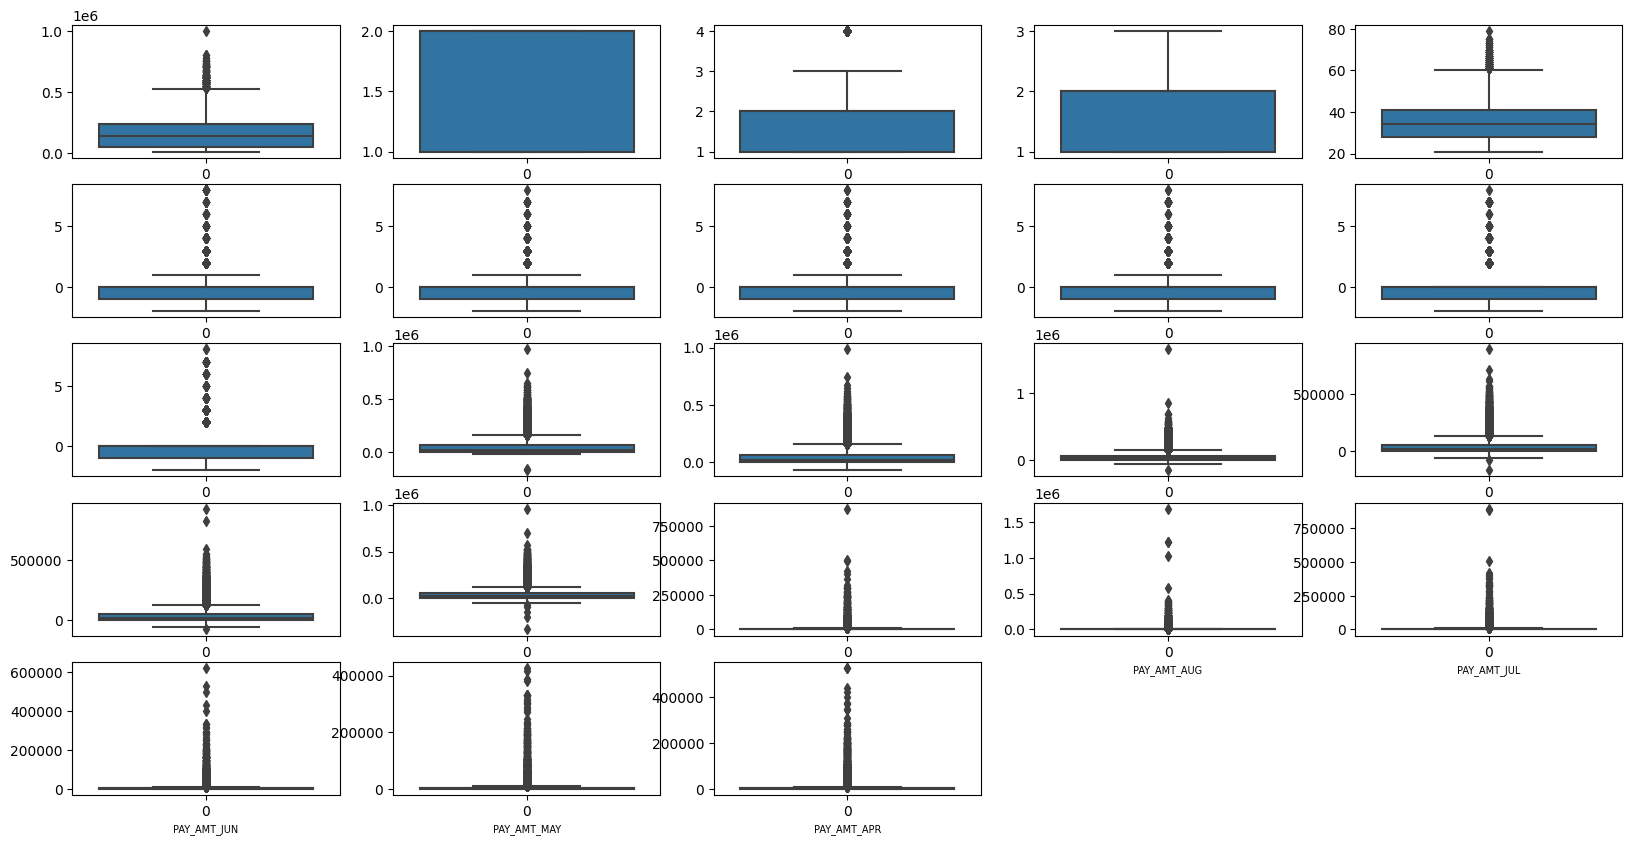

In [ ]:
# Plotting boxplot for every column in the dataset
plt.figure(figsize=(20,10))
for index,item in enumerate(outlier_columns):
  plt.subplot(5,5 ,index+1)
  sns.boxplot(dataset[item])
  plt.xlabel(item, fontsize= 7)                                                 #check this

In [ ]:
# Handling Pay Columns
# As a majority of our PAY data lies between -2 and 1 we shall remove rest of the observations
dataset = dataset[(dataset.PAY_SEPT < 2) & (dataset.PAY_AUG < 2) & (dataset.PAY_JUL < 2) & (dataset.PAY_JUN < 2) & (dataset.PAY_MAY < 2)  & (dataset.PAY_MAY < 2) & (dataset.PAY_APR < 2)]

In [ ]:
# Handling Limit Balance
# Removing outliers using z score method on Limit Balance column.
dataset['Z_LIMIT_BAL'] = np.abs(stats.zscore(dataset['LIMIT_BAL']))
dataset = dataset[(dataset['Z_LIMIT_BAL'] < 3)]
dataset.drop(['Z_LIMIT_BAL'],axis=1,inplace=True)

In [ ]:
# Handling Age Column
dataset=dataset[(dataset.AGE)<61]

In [ ]:
# Handling Education Column
dataset=dataset[(dataset.EDUCATION)<4]

In [ ]:
dataset.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,age_buckets
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,60+
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,31-40
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,20-30
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,20-30
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,31-40
14,15,250000,1,1,2,29,0,0,0,0,...,56875,55512,3000,3000,3000,3000,3000,3000,0,20-30
17,18,320000,1,1,1,49,0,0,0,-1,...,5856,195599,10358,10000,75940,20000,195599,50000,0,41-50
18,19,360000,2,1,1,49,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,41-50


In [ ]:
#Let's print values
print(dataset.shape[0])
print(dataset.shape[1])

20928
26


# **Multicollinearity**

What is Multicollinearity ?

Multicollinearity is a condition where a predictor variable correlates with another predictor. Although multicollinearity doesn't affect the model's performance, it will affect the interpretability.

Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model.

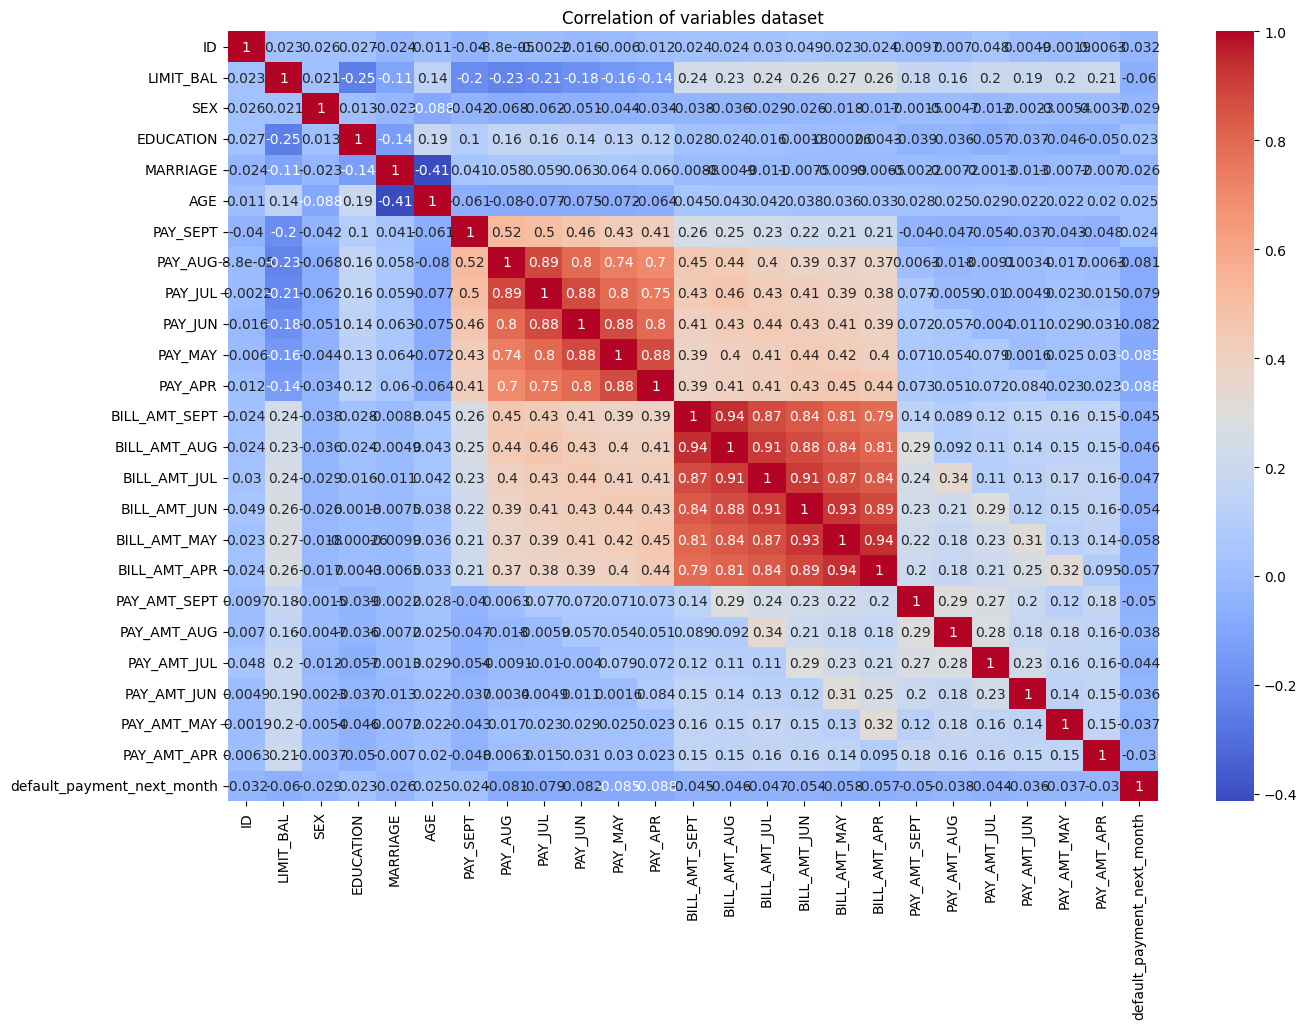

In [ ]:
#Plotting heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation of variables dataset')
plt.show()

Observing the heatmap above we can conclude that there exists high collinearity betwwen the BILL_AMT and PAY_AMT. We are dealing with this now.

In [ ]:
# Creating Payement_Value and Dues columns to treat multicollinearity
df_fr = dataset.copy()
df_fr['Payment_Value'] = df_fr['PAY_AMT_SEPT'] + df_fr['PAY_AMT_AUG'] + df_fr['PAY_AMT_JUL'] + df_fr['PAY_AMT_JUN'] + df_fr['PAY_AMT_MAY'] + df_fr['PAY_AMT_APR']

df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR'])

df_fr = df_fr.drop(['ID','BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR','age_buckets'],axis=1)

# **VIF**

What is VIF ?

The **Variance Inflation Factor(VIF)** is defined as a measure of degree of multicollinearity of one regressor when compared with other regressors. Higher the value of VIF, the higher is the multicollinearity.

In [ ]:
#Let's calculate the VIF
def calc_for_vf(X):
   vif = pd.DataFrame()
   vif["Columns"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
calc_for_vf(df_fr[[i for i in df_fr.describe().columns]])

,Columns,VIF
0,LIMIT_BAL,4.370420
1,SEX,9.602332
2,EDUCATION,7.846638
3,MARRIAGE,6.540865
4,AGE,12.882127
5,PAY_SEPT,1.753061
6,PAY_AUG,8.036301
7,PAY_JUL,12.745050
8,PAY_JUN,12.153690
9,PAY_MAY,11.501400


## **Feature Engineering**

# **One Hot Encoding**

As the categorical columns play a pivotal role in building the model, it is of prime importance to convert this categorical information into a format that might serve the model enough to better predict the dependant variable.

In [ ]:
# Encoding Education and Marriage since both are caategorical variables
df_fr = pd.get_dummies(columns = ['EDUCATION','MARRIAGE'], data = df_fr,drop_first=True)

In [ ]:
# Checking results of previous execution
df_fr.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default_payment_next_month,Payment_Value,Dues,EDUCATION_2,EDUCATION_3,MARRIAGE_2,MARRIAGE_3
2,90000,2,34,0,0,0,0,0,0,0,11018,82626,1,0,1,0
3,50000,2,37,0,0,0,0,0,0,0,8388,182101,1,0,0,0
4,50000,1,57,-1,0,-1,0,0,0,0,59049,102990,1,0,0,0
5,50000,1,37,0,0,0,0,0,0,0,7772,180245,0,0,1,0
6,500000,1,29,0,0,0,0,0,0,0,180759,2298802,0,0,1,0


**Splitting the dataset**

In [ ]:
# Splitting the dataset into dependent and independent variables.Here x=dependent variables and y=dependent variables
# x = df_fr.drop('default payment next month',axis=1)
# y = df_fr['default payment next month']

Axes(0.125,0.11;0.775x0.77)


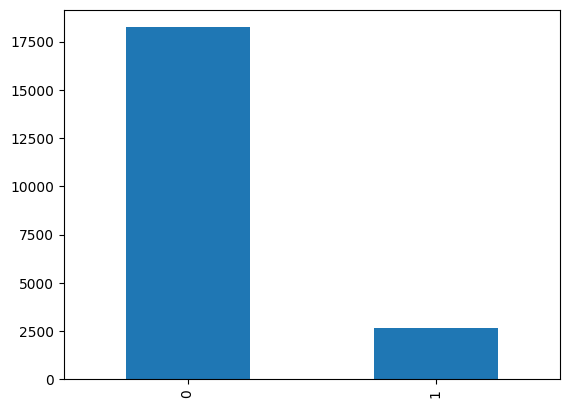

In [ ]:
print(df_fr.default_payment_next_month.value_counts().plot(kind='bar') )

In [ ]:
# Splitting the dataset into dependent and independent variables.Here x=dependent variables and y=dependent variables
x = df_fr.drop('default_payment_next_month',axis=1)
y = df_fr['default_payment_next_month']

# Handling Data Imbalance

In [ ]:
# Using Smote for handling data imbalance
SMOTE = SMOTE()
X_sm, Y_sm = SMOTE.fit_resample(x,y)

# summarize the new class distribution
Y_sm.value_counts()

0    18241
1    18241
Name: default_payment_next_month, dtype: int64

# Scaling

In [ ]:
# Standard Scaler for scaling the data
scale = StandardScaler()
x_std = scale.fit_transform(X_sm)

# Training and Testing the model

Why it is required ?

Evaluation of model performance: Splitting the data into training and testing sets allows us to measure how well our model performs on unseen data. By training the model on the training set and evaluating it on the testing set, we can get an estimate of its generalization ability. This helps to prevent overfitting, where the model performs very well on the training data but fails to generalize to new data.

Assessment of model bias and variance: Splitting the data helps to assess the bias-variance trade-off. If we observe a significant difference between the performance on the training set and the testing set, it indicates a high variance problem. On the other hand, if the model performs poorly on both sets, it suggests a high bias problem. This understanding can guide us in selecting appropriate model strategies, such as tuning hyperparameters or changing the model architecture.

Validation of model selection: By using separate training and testing datasets, we can compare the performance of different models. This helps in model selection and choosing the best algorithm or parameters based on their performance on the testing set. The testing set acts as an unbiased evaluation of the models' performance and allows us to choose the one that generalizes well.

In summary, creating training and testing datasets is crucial to evaluate and validate the performance of our models, as well as to avoid overfitting and facilitate model selection.

In [ ]:
#Importing library
from sklearn import model_selection

In [ ]:
# Train-Test Split for splitting the dataset into training and validation sets
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_std,Y_sm,test_size=0.2)

# **Model Implementation**

# Logistic Regression

In [ ]:
# Training Logistic Regression model
logistic = LogisticRegression(max_iter=200,random_state=42)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=200, random_state=42)

In [ ]:
# Predicting using our trained Logistic regression model
y_pred = logistic.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,roc_auc_score,recall_score,f1_score

In [ ]:
# Checking the classification metrics
log_prec=precision_score(y_pred,y_test)
log_rec=recall_score(y_pred,y_test)
log_acc=accuracy_score(y_pred,y_test)
log_f1=f1_score(y_pred,y_test)
log_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mLogistic Regression Classifier Model Metrics:\033[0m')
print(f"Precision Score: {log_prec}\nRecall Score: {log_rec}\nAccuracy Score: {log_acc}\nF1 Score: {log_f1}\nAUC-ROC score: {log_roc}")

Logistic Regression Classifier Model Metrics:
Precision Score: 0.7152607152607152
Recall Score: 0.721763085399449
Accuracy Score: 0.7186515006166918
F1 Score: 0.7184971890854243
AUC-ROC score: 0.7186671985491927


# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Training Support Vector Classifier Model
svc =SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [ ]:
# Predicting using our trained Support Vector Classifier model
y_pred = svc.predict(x_test)

<Axes: >

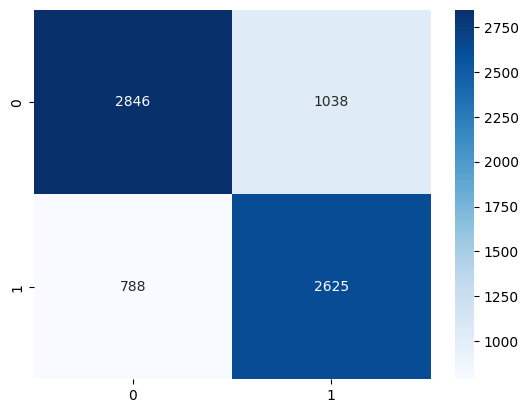

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
svc_prec=precision_score(y_pred,y_test)
svc_rec=recall_score(y_pred,y_test)
svc_acc=accuracy_score(y_pred,y_test)
svc_f1=f1_score(y_pred,y_test)
svc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svc_prec}\nRecall Score: {svc_rec}\nAccuracy Score: {svc_acc}\nF1 Score: {svc_f1}\nAUC-ROC score: {svc_roc}")

Support Vector Classifier Model Metrics:
Precision Score: 0.7166257166257166
Recall Score: 0.7691180779372986
Accuracy Score: 0.749760175414554
F1 Score: 0.7419446014697569
AUC-ROC score: 0.7509339102353846


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Training Decision Tree Classifier Model
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predicting using our trained Decision Tree Classifier model
y_pred = clf_tree.predict(x_test)

<Axes: >

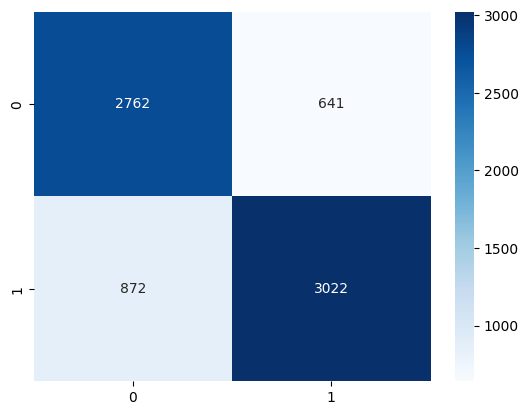

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
dtc_prec=precision_score(y_pred,y_test)
dtc_rec=recall_score(y_pred,y_test)
dtc_acc=accuracy_score(y_pred,y_test)
dtc_f1=f1_score(y_pred,y_test)
dtc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mDecision Tree Classifier Model Metrics:\033[0m')
print(f"Precision Score: {dtc_prec}\nRecall Score: {dtc_rec}\nAccuracy Score: {dtc_acc}\nF1 Score: {dtc_f1}\nAUC-ROC score: {dtc_roc}")

Decision Tree Classifier Model Metrics:
Precision Score: 0.825006825006825
Recall Score: 0.7760657421674371
Accuracy Score: 0.7926545155543374
F1 Score: 0.7997882757708086
AUC-ROC score: 0.7938512666170714


# Random Forest Classifier

In [ ]:
# Training Random Forest Classifier Model
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting using our trained Random Forest Classifier model
y_pred = forest.predict(x_test)

<Axes: >

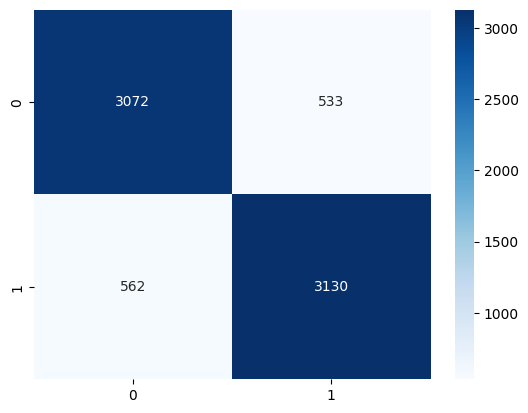

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
rfc_prec=precision_score(y_pred,y_test)
rfc_rec=recall_score(y_pred,y_test)
rfc_acc=accuracy_score(y_pred,y_test)
rfc_f1=f1_score(y_pred,y_test)
rfc_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mRandom Forest Classifier Metrics:\033[0m')
print(f"Precision Score: {rfc_prec}\nRecall Score: {rfc_rec}\nAccuracy Score: {rfc_acc}\nF1 Score: {rfc_f1}\nAUC-ROC score: {rfc_roc}")

Random Forest Classifier Metrics:
Precision Score: 0.8544908544908545
Recall Score: 0.8477789815817984
Accuracy Score: 0.8499383308208853
F1 Score: 0.8511216859279401
AUC-ROC score: 0.8499643867687078


# XGBoost

In [ ]:
# Training Linear Regression Model
xgb_clf=xgb.XGBClassifier(max_depth=5,learning_rate=0.3,n_jobs=-1,random_state=42)
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predicting using our trained Logistic regression model
y_pred = xgb_clf.predict(x_test)

<Axes: >

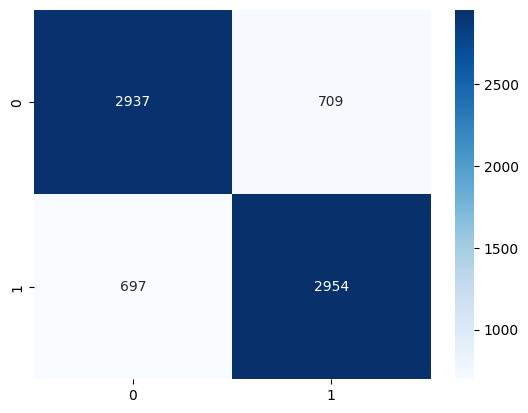

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
xgb_prec=precision_score(y_pred,y_test)
xgb_rec=recall_score(y_pred,y_test)
xgb_acc=accuracy_score(y_pred,y_test)
xgb_f1=f1_score(y_pred,y_test)
xgb_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mXGboost Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec}\nRecall Score: {xgb_rec}\nAccuracy Score: {xgb_acc}\nF1 Score: {xgb_f1}\nAUC-ROC score: {xgb_roc}")

XGboost Model Metrics:
Precision Score: 0.8064428064428064
Recall Score: 0.8090933990687483
Accuracy Score: 0.8073180759216116
F1 Score: 0.8077659283565763
AUC-ROC score: 0.8073168586128163


# **HyperParameter Tuning**

# Logistic Regression

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet','none'],'C':list(np.linspace(0,1,11)),'max_iter':list(range(50,500,50))}

# Defining object for GridSearchCV
logistic_GCV = LogisticRegression(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
logistic_GCV=GridSearchCV(logistic_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
logistic_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0],
                         'max_iter': [50, 100, 150, 200, 250, 300, 350, 400,
                                      450],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = logistic_GCV.predict(x_test)

<Axes: >

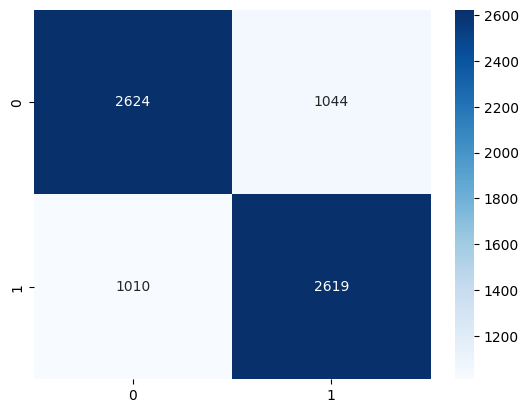

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Printing the metrics for GridSearchCV
log_prec_gcv=precision_score(y_pred,y_test)
log_rec_gcv=recall_score(y_pred,y_test)
log_acc_gcv=accuracy_score(y_pred,y_test)
log_f1_gcv=f1_score(y_pred,y_test)
log_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Logistic Regression according to GCV:\033[0m',logistic_GCV.best_params_)
print('\033[1mTuned Logistic Regression Model Metrics:\033[0m')
print(f"Precision Score: {log_prec_gcv}\nRecall Score: {log_rec_gcv}\nAccuracy Score: {log_acc_gcv}\nF1 Score: {log_f1_gcv}\nAUC-ROC score: {log_roc_gcv}")

Best Parameters for Logistic Regression according to GCV: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2'}
Tuned Logistic Regression Model Metrics:
Precision Score: 0.714987714987715
Recall Score: 0.7216864149903555
Accuracy Score: 0.7185144579964369
F1 Score: 0.7183214481623696
AUC-ROC score: 0.718531320908482


# Support Vector Classifier

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'C':list(np.linspace(0,1,11))}

# Defining object for GridSearchCV
SVC_GCV = SVC(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
SVC_GCV=GridSearchCV(SVC_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
SVC_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0]},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = SVC_GCV.predict(x_test)

<Axes: >

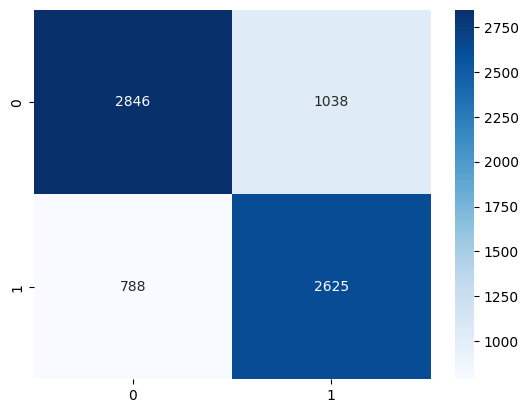

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
svc_prec_gcv=precision_score(y_pred,y_test)
svc_rec_gcv=recall_score(y_pred,y_test)
svc_acc_gcv=accuracy_score(y_pred,y_test)
svc_f1_gcv=f1_score(y_pred,y_test)
svc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Support Vector Classifier according to GCV:\033[0m',SVC_GCV.best_params_)
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svc_prec_gcv}\nRecall Score: {svc_rec_gcv}\nAccuracy Score: {svc_acc_gcv}\nF1 Score: {svc_f1_gcv}\nAUC-ROC score: {svc_roc_gcv}")

Best Parameters for Support Vector Classifier according to GCV: {'C': 1.0}
Support Vector Classifier Model Metrics:
Precision Score: 0.7166257166257166
Recall Score: 0.7691180779372986
Accuracy Score: 0.749760175414554
F1 Score: 0.7419446014697569
AUC-ROC score: 0.7509339102353846


# Decision Tree Classifier

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
dtc_GCV = DecisionTreeClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
dtc_GCV=GridSearchCV(dtc_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
dtc_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = dtc_GCV.predict(x_test)

<Axes: >

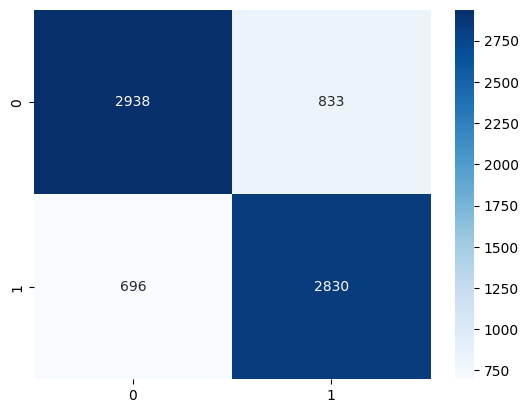

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
dtc_prec_gcv=precision_score(y_pred,y_test)
dtc_rec_gcv=recall_score(y_pred,y_test)
dtc_acc_gcv=accuracy_score(y_pred,y_test)
dtc_f1_gcv=f1_score(y_pred,y_test)
dtc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to GCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mDecision Tree Classifier Model Metrics:\033[0m')
print(f"Precision Score: {dtc_prec_gcv}\nRecall Score: {dtc_rec_gcv}\nAccuracy Score: {dtc_acc_gcv}\nF1 Score: {dtc_f1_gcv}\nAUC-ROC score: {dtc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to GCV: {'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Classifier Model Metrics:
Precision Score: 0.7725907725907726
Recall Score: 0.8026091888825865
Accuracy Score: 0.790461833630259
F1 Score: 0.7873139518709138
AUC-ROC score: 0.7908564374537568


# Random Forest Classifier

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
rfc_GCV = RandomForestClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
rfc_GCV=GridSearchCV(rfc_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
rfc_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = rfc_GCV.predict(x_test)

<Axes: >

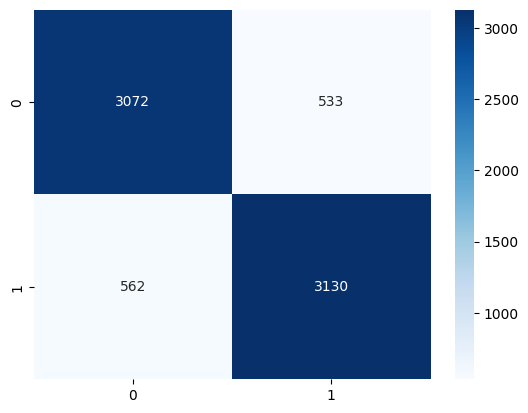

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
rfc_prec_gcv=precision_score(y_pred,y_test)
rfc_rec_gcv=recall_score(y_pred,y_test)
rfc_acc_gcv=accuracy_score(y_pred,y_test)
rfc_f1_gcv=f1_score(y_pred,y_test)
rfc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to GCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mRandom Forest Classifier Model Metrics:\033[0m')
print(f"Precision Score: {rfc_prec_gcv}\nRecall Score: {rfc_rec_gcv}\nAccuracy Score: {rfc_acc_gcv}\nF1 Score: {rfc_f1_gcv}\nAUC-ROC score: {rfc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to GCV: {'min_samples_leaf': 2, 'min_samples_split': 5}
Random Forest Classifier Model Metrics:
Precision Score: 0.8544908544908545
Recall Score: 0.8477789815817984
Accuracy Score: 0.8499383308208853
F1 Score: 0.8511216859279401
AUC-ROC score: 0.8499643867687078


## XGBoost

In [ ]:
# Initializing paramter grid for GridSearchCV
parameters = {'learning_rate':list(np.linspace(0,1,11))}

# Defining object for GridSearchCV
xgb_GCV = xgb.XGBClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
xgb_GCV=GridSearchCV(xgb_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object
xgb_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0, 0.1, 0.2, 0.30000000000000004,
                                           0.4, 0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0]},
             scoring='precision', verbose=10)

In [ ]:
# Predicting Using GridSearchCV
y_pred = xgb_GCV.predict(x_test)

<Axes: >

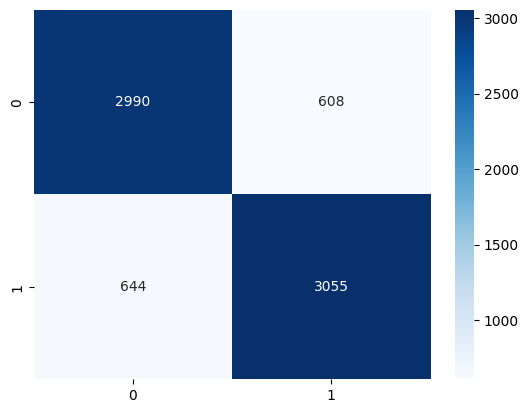

In [ ]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [ ]:
# Checking the classification metrics
xgb_prec_gcv=precision_score(y_pred,y_test)
xgb_rec_gcv=recall_score(y_pred,y_test)
xgb_acc_gcv=accuracy_score(y_pred,y_test)
xgb_f1_gcv=f1_score(y_pred,y_test)
xgb_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for XGBoost Classifier according to GCV:\033[0m',xgb_GCV.best_params_)
print('\033[1mXGBoost Classifier Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec_gcv}\nRecall Score: {xgb_rec_gcv}\nAccuracy Score: {xgb_acc_gcv}\nF1 Score: {xgb_f1_gcv}\nAUC-ROC score: {xgb_roc_gcv}")

Best Parameters for XGBoost Classifier according to GCV: {'learning_rate': 0.6000000000000001}
XGBoost Classifier Model Metrics:
Precision Score: 0.834015834015834
Recall Score: 0.8258988915923222
Accuracy Score: 0.8284226394408661
F1 Score: 0.8299375169790817
AUC-ROC score: 0.828458061693882


# Classification Metrics

The lists for models are being created for plotting and comparision.

In [ ]:
precision,recall,accuracy,f1,roc=[],[],[],[],[]
precision.extend([log_prec,svc_prec,dtc_prec,rfc_prec,xgb_prec])
recall.extend([log_rec,svc_rec,dtc_rec,rfc_rec,xgb_rec])
accuracy.extend([log_acc,svc_acc,dtc_acc,rfc_acc,xgb_acc])
f1.extend([log_f1,svc_f1,dtc_f1,rfc_f1,xgb_f1])
roc.extend([log_roc,svc_roc,dtc_roc,rfc_roc,xgb_roc])
precision=[int(i*100) for i in precision]
recall=[int(i*100) for i in recall]
accuracy=[int(i*100) for i in accuracy]
f1=[int(i*100) for i in f1]
roc=[int(i*100) for i in roc]

The lists for tuned models are being created.

In [ ]:
precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv=[],[],[],[],[]
precision_gcv.extend([log_prec_gcv,svc_prec_gcv,dtc_prec_gcv,rfc_prec_gcv,xgb_prec_gcv])
recall_gcv.extend([log_rec_gcv,svc_rec_gcv,dtc_rec_gcv,rfc_rec_gcv,xgb_rec_gcv])
accuracy_gcv.extend([log_acc_gcv,svc_acc_gcv,dtc_acc_gcv,rfc_acc_gcv,xgb_acc_gcv])
f1_gcv.extend([log_f1_gcv,svc_f1_gcv,dtc_f1_gcv,rfc_f1_gcv,xgb_f1_gcv])
roc_gcv.extend([log_roc_gcv,svc_roc_gcv,dtc_roc_gcv,rfc_roc_gcv,xgb_roc_gcv])
precision_gcv=[int(i*100) for i in precision_gcv]
recall_gcv=[int(i*100) for i in recall_gcv]
accuracy_gcv=[int(i*100) for i in accuracy_gcv]
f1_gcv=[int(i*100) for i in f1_gcv]
roc_gcv=[int(i*100) for i in roc_gcv]

Plotting line graphs for all the executions performed.

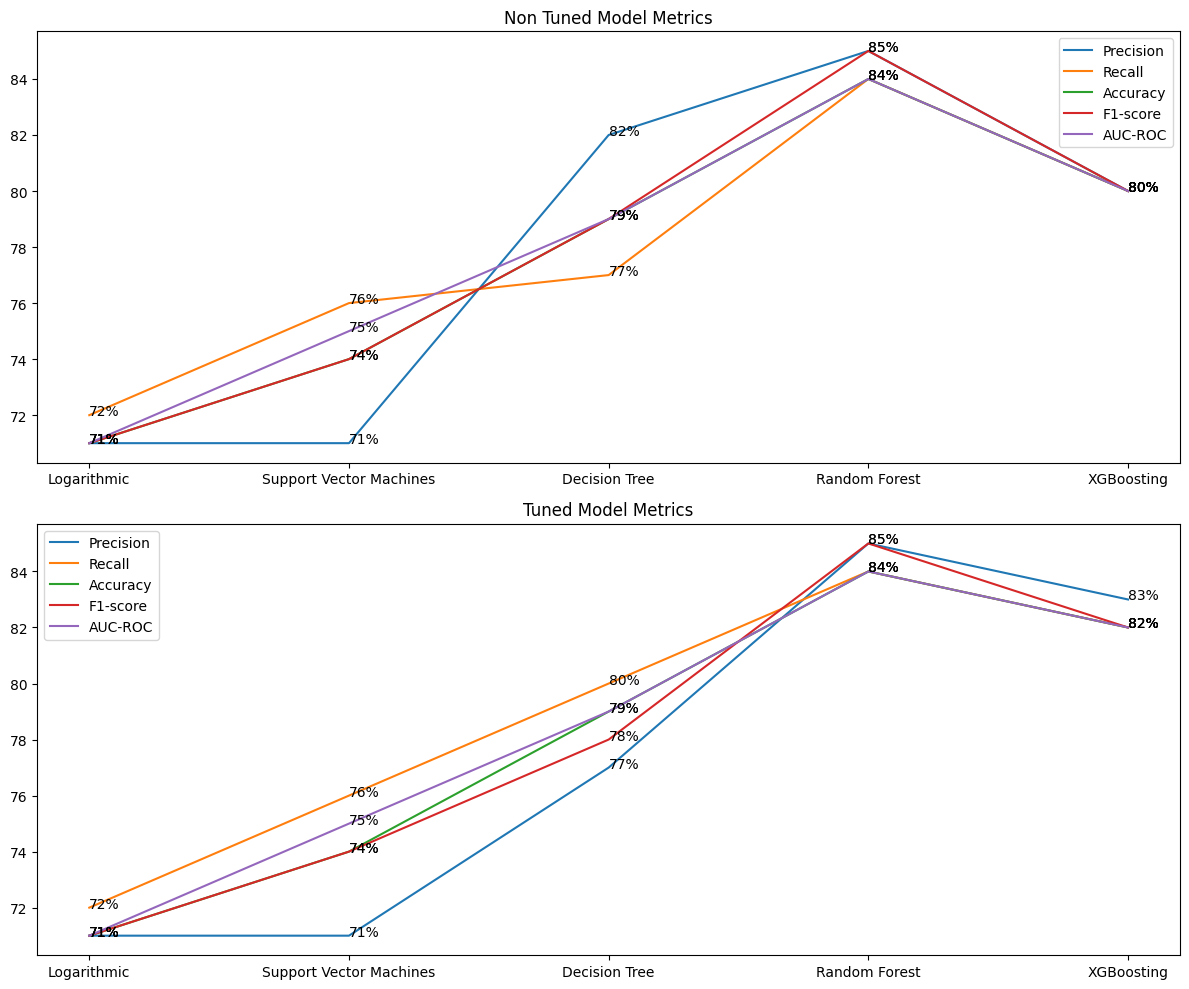

In [ ]:
x=['Logarithmic','Support Vector Machines','Decision Tree','Random Forest','XGBoosting']
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
for i in [precision,recall,accuracy,f1,roc]:
    plt.plot(x,i)
    for a,z in zip(x,i):
        plt.text(a,z,str(z)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Non Tuned Model Metrics')

plt.subplot(2,1,2)
for i in [precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv]:
    plt.plot(x,i)
    for a,d in zip(x,i):
        plt.text(a,d,str(d)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Tuned Model Metrics')
plt.tight_layout()

# **From the above analysis, we conclude that Random Forest Classification model is the best performing model amongst all models implemented with an accuracy percentage of 84%.**

# **Conclusion**:
EDA Insights:



*   A majority of credit card users are non-defaulters whereas only 22% of users are defaulters.
*   According to gender, Females have defaulted more than men whereas among the non-defaulters, women are more than men.
*   Considering Marital Status, Singles have defaulted more than married people, however amongst the non-defaulters, singles are more than any of the marital categories.
*   According to payment records, for every month for which data is present there is lesser chance of default for following month if there has not been default for the previous month.
*   Higher amount of credit is given to persons having age greater than 60 Years also there are more credit card amounts taken by people lying in the age bracket of 27-40 Years.

Model Insights:


*   Of all the models implemented, Random Forest model had the highest accuracy of predictions with utmost accuracy. The accuracy of this model was 85%.
*   XG Boost model also performed well with higher accuracy. The accuracy of this model was 80%.
*   The education column was cleaned with numerical values for better predictability.
*   The marriage column was compared with a constant and then edited to enhance the prediction process.

Usefulness to Stakeholders:

*   The source of income is a mojor contributor towards ascertaining the amount of credit and the type of credit card that is being offered to an individual. Hence, these models can further be utilized to present such services to clients.
*   The credit limit can be enhanced for people aged between 41-60 as there is less possibility of default considering average income. This would push up sales of credit card.
*   The classification models can be used in the production environment to better predict the possibility of default for an individual based on the data an organization has.
*   The data and the models are a great source to apprehend the individuals who are better suited for further credit and loans which would benefit the organization.

















# The Project is complete!!